# <center> Ансамбли </center>

In [5]:
from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import plotly.graph_objects as go

In [6]:
X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]
dataset_names = ["Moons", "Circles", "Linearly Separable"]

data_moon = datasets[1]

X, y = data_moon

y = np.array([ -1.0 if i == 0 else float(i) for i in y])

## Задание 

1. Реализовать алгоритм градиентного бустинга для логарифмической функции потерь.
2. Оценить качество работы алгоритма на сгенерированных трех наборах данных. 

# Задание 1 

In [7]:
from sklearn.metrics import *
from sklearn.tree import DecisionTreeRegressor

Попробуем написать всё классом:

In [8]:
class GradientBoosting:
    def __init__(self, T, lambd):
        self.T = T
        self.lambd = lambd
        self.models = []
        self.alphas = []
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def gradient(self, y, b_x):
        return y * self.sigmoid(-b_x * y)
    def fit(self, X, y):
        l = len(y)
        self.a = np.ones(l) / l  #зададим также как в адабусте, работает хорошо))
        for t in range(self.T):
            residuals = self.gradient(y, self.a)  #антиградиент
            model = DecisionTreeRegressor()  #делаем регрессором
            model.fit(X, residuals)
            b_t = model.predict(X)
            self.a += self.lambd * b_t 
            self.models.append(model)
            self.alphas.append(self.lambd)
    def predict(self, X):
        prediction = np.zeros(X.shape[0])
        for model, alpha in zip(self.models, self.alphas):
            prediction += alpha * model.predict(X)
        return np.sign(prediction), self.alphas


Потестируем на том наборе данных, который есть:

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
gb = GradientBoosting(T=10, lambd=0.1)
gb.fit(X_train, y_train)
preds = gb.predict(X_train)
print(preds)

(array([-1.,  1.,  1., -1.,  1., -1., -1.,  1., -1., -1.,  1.,  1.,  1.,
        1., -1., -1., -1., -1.,  1.,  1., -1.,  1., -1., -1.,  1.,  1.,
       -1., -1., -1.,  1., -1., -1.,  1., -1., -1.,  1., -1., -1.,  1.,
        1., -1.,  1., -1., -1., -1.,  1.,  1.,  1., -1.,  1., -1., -1.,
        1., -1.,  1., -1.,  1., -1.,  1., -1., -1., -1., -1., -1., -1.,
       -1., -1.,  1.,  1.,  1.]), [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])


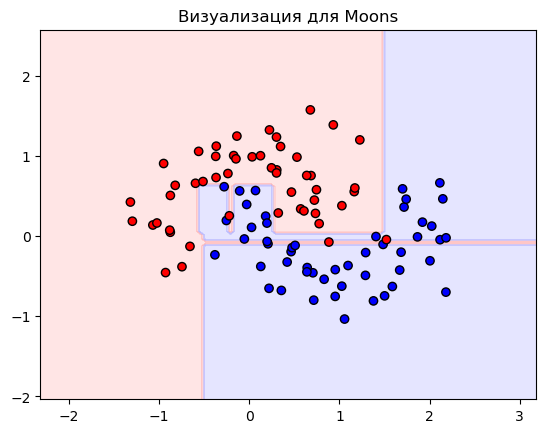

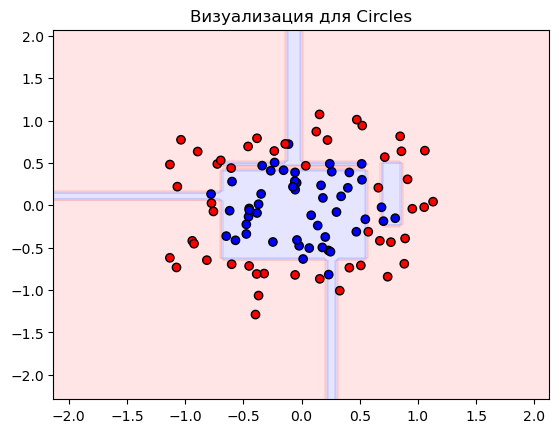

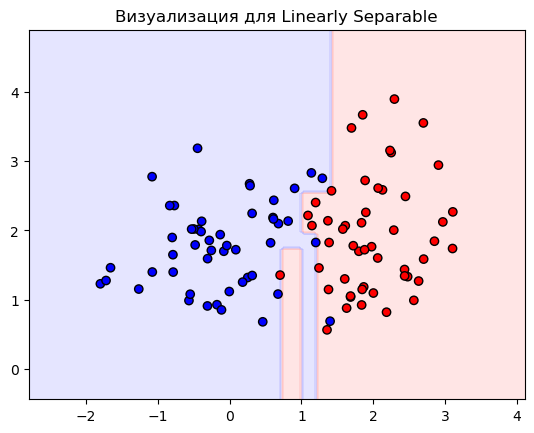

In [20]:
from matplotlib.colors import ListedColormap

for name, (X, y) in zip(dataset_names, datasets):
    y = np.array([-1.0 if i == 0 else float(i) for i in y])
    gb = GradientBoosting(T=10, lambd=0.1)
    gb.fit(X, y)
    preds, _ = gb.predict(X)
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    
    Z, _ = gb.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=ListedColormap(['#FF0000', '#0000FF']))
    plt.title(f"Визуализация для {name}")
    plt.show()

# Задание 2

In [26]:
for name, (X, y) in zip(dataset_names, datasets):
    y = np.array([-1.0 if i == 0 else float(i) for i in y])
    gb = GradientBoosting(T=10, lambd=0.1)
    gb.fit(X, y)
    preds, alphas = gb.predict(X)
    accuracy = accuracy_score(y, preds)
    print(f"{name} Dataset: Accuracy = {accuracy}")

Moons Dataset: Accuracy = 1.0
Circles Dataset: Accuracy = 1.0
Linearly Separable Dataset: Accuracy = 1.0


In [47]:
results = []
for (X, y), name in zip(datasets, dataset_names):
    y = np.array([-1.0 if i == 0 else float(i) for i in y])  

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    gb_clf = GradientBoosting(T=10, lambd=0.1)
    gb_clf.fit(X_train, y_train)
    y_pred = gb_clf.predict(X_test)[0]
    accuracy = accuracy_score(y_test, y_pred)
    results.append((name, accuracy))

In [48]:
results

[('Moons', 0.9333333333333333),
 ('Circles', 0.7333333333333333),
 ('Linearly Separable', 0.9333333333333333)]

Получились хорошие результаты на Moons и Linearly Separable, результат на Circles какой-то не очень, но в целом тоже не плохой.